# Step 0: Imports and loading user data



In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
# import pickle5 as pickle
# %matplotlib inline 

In [3]:
# u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
# users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')
# users


# ------------------------------- Uncomment code below to import 1M dataset -------------------------------------------
unames = ['user_id','sex','age','occupation','zip']
# users1M = pd.read_csv('ml-1m/users.dat', sep='::', names=unames, encoding='latin-1')
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')
users
# users.isna().sum() # Shows that no rows contain any features that have null values. 

,user_id,sex,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [4]:
users_without_zip = users.loc[:, ['age', 'sex']]
users_without_zip
# users_without_zip.loc[users_without_zip['sex'] == 'M']

,age,sex
0,1,F
1,56,M
2,25,M
3,45,M
4,25,M
...,...,...
6035,25,F
6036,45,F
6037,56,F
6038,45,F


# Step1:  Encode the categorical features 

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


In [6]:
col_trans = make_column_transformer((OneHotEncoder(), ['sex']), remainder='passthrough')

In [7]:
col_trans.fit_transform(users_without_zip)
dummy_users = pd.DataFrame(col_trans.fit_transform(users_without_zip))
dummy_users

,0,1,2
0,1.0,0.0,1.0
1,0.0,1.0,56.0
2,0.0,1.0,25.0
3,0.0,1.0,45.0
4,0.0,1.0,25.0
...,...,...,...
6035,1.0,0.0,25.0
6036,1.0,0.0,45.0
6037,1.0,0.0,56.0
6038,1.0,0.0,45.0


# Step 2: Scale each feature

In [8]:
from sklearn.preprocessing import MinMaxScaler 

In [9]:
scaled_dummy_users = dummy_users.copy(deep=True)
scaler = MinMaxScaler()
scaler.fit(dummy_users[[2]])
scaled_dummy_users[2] = scaler.transform(dummy_users[[2]])
scaled_dummy_users

,0,1,2
0,1.0,0.0,0.000000
1,0.0,1.0,1.000000
2,0.0,1.0,0.436364
3,0.0,1.0,0.800000
4,0.0,1.0,0.436364
...,...,...,...
6035,1.0,0.0,0.436364
6036,1.0,0.0,0.800000
6037,1.0,0.0,1.000000
6038,1.0,0.0,0.800000


# Step 3: Apply k-means clustering

In [10]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

In [11]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(scaled_dummy_users)
    sse.append(km.inertia_)

In [12]:
sse

[2782.893995347719,
 331.9686613952175,
 168.25666099022493,
 102.69841593047215,
 65.3581209567039,
 48.393305443595764,
 33.07422050748589,
 23.112233083411695,
 12.1242529357199]

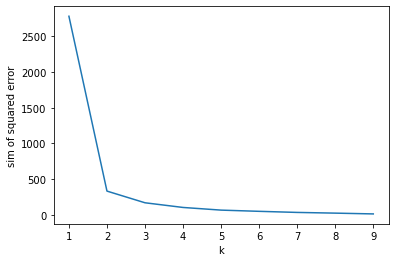

In [13]:
plt.xlabel("k")
plt.ylabel("sim of squared error")
plt.plot(k_range, sse)

In [14]:
for i in range(2, 20):
    labels = KMeans(n_clusters=i, init='k-means++', random_state=200).fit(scaled_dummy_users).labels_
    score = metrics.silhouette_score(scaled_dummy_users, labels, metric="euclidean", sample_size=1000, random_state=200)
    print("Silhouette score for k(clusters) = " + str(i) + " is " +   str(score))

Silhouette score for k(clusters) = 2 is 0.8216628373995492
Silhouette score for k(clusters) = 3 is 0.7203475602642477
Silhouette score for k(clusters) = 4 is 0.6786099746578489
Silhouette score for k(clusters) = 5 is 0.6949489724926132
Silhouette score for k(clusters) = 6 is 0.7512378183778999
Silhouette score for k(clusters) = 7 is 0.7541804489749157
Silhouette score for k(clusters) = 8 is 0.7834394917224493
Silhouette score for k(clusters) = 9 is 0.8775511152518624
Silhouette score for k(clusters) = 10 is 0.9156309471846359
Silhouette score for k(clusters) = 11 is 0.9296802380250656
Silhouette score for k(clusters) = 12 is 0.9385048433048431
Silhouette score for k(clusters) = 13 is 0.9781743589743589
Silhouette score for k(clusters) = 14 is 1.0


C:\Users\rahul\AppData\Local\Temp/ipykernel_23480/2515526261.py:2: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  labels = KMeans(n_clusters=i, init='k-means++', random_state=200).fit(scaled_dummy_users).labels_


Silhouette score for k(clusters) = 15 is 1.0


C:\Users\rahul\AppData\Local\Temp/ipykernel_23480/2515526261.py:2: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  labels = KMeans(n_clusters=i, init='k-means++', random_state=200).fit(scaled_dummy_users).labels_
C:\Users\rahul\AppData\Local\Temp/ipykernel_23480/2515526261.py:2: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  labels = KMeans(n_clusters=i, init='k-means++', random_state=200).fit(scaled_dummy_users).labels_


Silhouette score for k(clusters) = 16 is 1.0
Silhouette score for k(clusters) = 17 is 1.0


C:\Users\rahul\AppData\Local\Temp/ipykernel_23480/2515526261.py:2: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  labels = KMeans(n_clusters=i, init='k-means++', random_state=200).fit(scaled_dummy_users).labels_
C:\Users\rahul\AppData\Local\Temp/ipykernel_23480/2515526261.py:2: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  labels = KMeans(n_clusters=i, init='k-means++', random_state=200).fit(scaled_dummy_users).labels_


Silhouette score for k(clusters) = 18 is 1.0
Silhouette score for k(clusters) = 19 is 1.0


In [15]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=200).fit(scaled_dummy_users)
cluster = kmeans.labels_
clusters_scaled_dummy_users = scaled_dummy_users.copy(deep=True)
clusters_scaled_dummy_users['clusters'] = cluster
clusters_scaled_dummy_users['user_id'] = users['user_id'] # Adding back the user_id's for each user. 
clusters_scaled_dummy_users

,0,1,2,clusters,user_id
0,1.0,0.0,0.000000,0,1
1,0.0,1.0,1.000000,1,2
2,0.0,1.0,0.436364,1,3
3,0.0,1.0,0.800000,1,4
4,0.0,1.0,0.436364,1,5
...,...,...,...,...,...
6035,1.0,0.0,0.436364,0,6036
6036,1.0,0.0,0.800000,0,6037
6037,1.0,0.0,1.000000,0,6038
6038,1.0,0.0,0.800000,0,6039


In [16]:
for i in range(0, 7):
    cluster_size = len(clusters_scaled_dummy_users.loc[clusters_scaled_dummy_users['clusters'] == i])
    print("Cluster " + str(i) + " : " + str(cluster_size))


Cluster 0 : 1709
Cluster 1 : 4331
Cluster 2 : 0
Cluster 3 : 0
Cluster 4 : 0
Cluster 5 : 0
Cluster 6 : 0


In [17]:
kmeans.predict(scaled_dummy_users.loc[[941]])

array([0])

# Phase 2: Collaborative filtering
## Step 0: Imports

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Step 1: Import data


In [19]:
# r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
# ratings = pd.read_csv('ml-100k/u.data',  sep='\t', names=r_cols, encoding='latin-1')
# ratings.head()


# ------------------------------- Uncomment code below to import 1M dataset -------------------------------------------
#Rating information
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [20]:
# i_cols = ['movie_id', 'title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure','Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
# movies = pd.read_csv('ml-100k/u.item',  sep='|', names=i_cols, encoding='latin-1')
# movies.head()


# ------------------------------- Uncomment code below to import 1M dataset -------------------------------------------
#Movie information
# movies = pd.read_csv('ml-1m/movies.dat', engine='python', sep='::', names=['movieid', 'title', 'genre']).set_index('movieid')
# movies['genre'] = movies.genre.str.split('|')

## Step 2: Split raw data into train and test sets 

In [21]:
# Assign X as the original ratings dataframe and y as the user_id column of ratings.

X = ratings.copy()
y = ratings['user_id']

# Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=200) #Original random_state=42


## Step 3: Construct userToItemRatings matrix

In [22]:
df_ratings = X_train.pivot(index='user_id', columns='movie_id', values='rating')
df_ratings


movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4: Data cleaning

In [23]:
df_ratings_dummy = df_ratings.copy().fillna(0) 
df_ratings_dummy.head()

# TODO: Normalize the data to have zero mean. 
# TODO: Fill NaN values of a given row i with the mean rating of user i

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 5: Calculate userToUserSim matrix


In [24]:
similarity_matrix = cosine_similarity(df_ratings_dummy, df_ratings_dummy)
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.index, columns=df_ratings.index)
similarity_matrix_df

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.054942,0.110481,0.054527,0.059412,0.110008,0.078723,0.106188,0.145129,0.163356,...,0.200698,0.048767,0.034533,0.000000,0.023604,0.143081,0.085763,0.000000,0.093703,0.093471
2,0.054942,1.000000,0.101182,0.156061,0.086510,0.047209,0.211075,0.129715,0.119545,0.163961,...,0.093858,0.021643,0.238369,0.000000,0.093435,0.149818,0.194542,0.056800,0.051353,0.176732
3,0.110481,0.101182,1.000000,0.107683,0.031604,0.039758,0.109402,0.053230,0.057900,0.183169,...,0.111765,0.039309,0.109116,0.000000,0.047170,0.096213,0.113440,0.174807,0.063182,0.096438
4,0.054527,0.156061,0.107683,1.000000,0.014038,0.018165,0.095485,0.045682,0.027433,0.107348,...,0.082988,0.069843,0.312351,0.000000,0.065733,0.141993,0.046249,0.089613,0.038054,0.131286
5,0.059412,0.086510,0.031604,0.014038,1.000000,0.035818,0.130611,0.150242,0.194601,0.082988,...,0.064587,0.026263,0.058677,0.070611,0.100378,0.199304,0.164050,0.006725,0.025757,0.192832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.143081,0.149818,0.096213,0.141993,0.199304,0.071442,0.080824,0.179610,0.185704,0.251052,...,0.102176,0.153172,0.137998,0.065827,0.206375,1.000000,0.214014,0.088549,0.177163,0.285993
6037,0.085763,0.194542,0.113440,0.046249,0.164050,0.065269,0.076195,0.129580,0.153112,0.196068,...,0.108919,0.270924,0.072038,0.047476,0.119815,0.214014,1.000000,0.070354,0.159983,0.333821
6038,0.000000,0.056800,0.174807,0.089613,0.006725,0.094264,0.000000,0.027354,0.000000,0.122799,...,0.124939,0.068771,0.041275,0.000000,0.050380,0.088549,0.070354,1.000000,0.058332,0.083236


## Step 6: Define function to predict ratings


In [55]:
def calculate_ratings(id_movie, id_user): 
    if id_movie in df_ratings:
        cosine_scores = similarity_matrix_df[id_user] #similarity of id_user with every other user
        ratings_scores = df_ratings[id_movie]      #ratings of every other user for the movie id_movie

        #won't consider users who havent rated id_movie so drop similarity scores and ratings corresponsing to np.nan

        index_not_rated = ratings_scores[ratings_scores.isnull()].index

        ratings_scores = ratings_scores.dropna()

        cosine_scores = cosine_scores.drop(index_not_rated)


# ---------------------------------------------------------------------

        # Find the user-id's of users who are in the same/different cluster
        cluser_of_user = clusters_scaled_dummy_users.loc[clusters_scaled_dummy_users['user_id'] == id_user]['clusters'].item()
        # cluser_of_user

        users_in_other_cluster = clusters_scaled_dummy_users.loc[clusters_scaled_dummy_users['clusters'] != cluser_of_user]
        # users_in_other_cluster
        index_of_users_in_other_clusters = users_in_other_cluster['user_id'].values[:]
        # index_of_users_in_other_clusters

        users_in_same_cluster = clusters_scaled_dummy_users.loc[clusters_scaled_dummy_users['clusters'] == cluser_of_user]
        index_of_users_in_same_clusters = users_in_same_cluster['user_id'].values[:]
        # index_of_users_in_same_clusters

        cosine_scores_same_cluster = cosine_scores.drop(index_of_users_in_other_clusters, errors='ignore')
        # cosine_scores_same_cluster
        cosine_scores_other_cluster = cosine_scores.drop(index_of_users_in_same_clusters, errors='ignore')
        # cosine_scores_other_cluster 
        
        ratings_scores_same_cluster = ratings_scores.drop(index_of_users_in_other_clusters, errors='ignore')
        ratings_scores_other_cluster = ratings_scores.drop(index_of_users_in_same_clusters, errors='ignore')

# --------------------------------------------------------------------------------       
        
        if(cosine_scores_other_cluster.sum() == 0 or cosine_scores_same_cluster.sum() == 0): 
            #calculating rating by weighted mean of ratings and cosine scores of the users who have rated the movie
            if (cosine_scores.sum() == 0):
                ratings_movie = 0
            else: 
                ratings_movie = (ratings_scores.dot(cosine_scores))/cosine_scores.sum()
        else: 
            ratings_movie_same_cluster = (ratings_scores_same_cluster.dot(cosine_scores_same_cluster))/cosine_scores_same_cluster.sum()
            ratings_movie_other_cluster = (ratings_scores_other_cluster.dot(cosine_scores_other_cluster))/cosine_scores_other_cluster.sum()
            ratings_movie = 0.8*ratings_movie_same_cluster + 0.2*ratings_movie_other_cluster
    
    else:
        # TODO: Find a better default value to return instead of just 2.5 
        return 2.5
    return ratings_movie

In [56]:
# calculate_ratings(3,150) #predicts rating for user_id 150 and movie_id 3

## Step 7: Evaluate performance on test set


In [57]:
def simulate_cold_start(maxNumOfRatingsPerUser, X_test):
    # Step 1: Create an empty dataFrame. 
    X_test_simulated = X_test.copy(deep=True)
    X_test_simulated.drop(X_test_simulated.index, inplace=True)
    
    # Step 2: Loop over every single user_id present in X_test 
    for user_id in X_test['user_id'].unique():
        # Step 3: Take only maxNumOfRatingsPerUser and insert those into our empty dataFrame from step1
        new_user_row = X_test.loc[X_test['user_id']==user_id].sample(frac=1)
        X_test_simulated = pd.concat((X_test_simulated,new_user_row.head(maxNumOfRatingsPerUser)),axis=0) 
        
    return X_test_simulated

In [58]:
def score_on_test_set_cold_start(simulated_cold_start_test_users, ):
    user_movie_pairs = zip(simulated_cold_start_test_users['movie_id'], simulated_cold_start_test_users['user_id'])
    predicted_ratings = np.array([calculate_ratings(movie, user) for (movie,user) in user_movie_pairs])
    true_ratings = np.array(simulated_cold_start_test_users['rating'])
    score = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
    return score

In [59]:
RMSE_values = np.zeros(60)
for i in range(1, 60):
    simulated_cold_start_test_users = simulate_cold_start(i, X_test)
    score = score_on_test_set_cold_start(simulated_cold_start_test_users)
    print("Now testing for cold-start conditions with MaxRatingsPerUser = " + str(i))
    print(score)
    RMSE_values[i] = score

Now testing for cold-start conditions with MaxRatingsPerUser = 1
0.9741940832484944
Now testing for cold-start conditions with MaxRatingsPerUser = 2
0.9774213838621699
Now testing for cold-start conditions with MaxRatingsPerUser = 3
0.9774252074058044
Now testing for cold-start conditions with MaxRatingsPerUser = 4
0.9767823271181963
Now testing for cold-start conditions with MaxRatingsPerUser = 5
0.9796380270166034
Now testing for cold-start conditions with MaxRatingsPerUser = 6
0.9820572666837176
Now testing for cold-start conditions with MaxRatingsPerUser = 7
0.9855749629638724
Now testing for cold-start conditions with MaxRatingsPerUser = 8
0.9837421241487505
Now testing for cold-start conditions with MaxRatingsPerUser = 9
0.9821807918048522
Now testing for cold-start conditions with MaxRatingsPerUser = 10
0.9816049091947378
Now testing for cold-start conditions with MaxRatingsPerUser = 11
0.9819824396203737
Now testing for cold-start conditions with MaxRatingsPerUser = 12
0.980481

In [40]:
# id_user = 1
# id_movie = 1

# cosine_scores = similarity_matrix_df[id_user] #similarity of id_user with every other user
# ratings_scores = df_ratings[id_movie]      #ratings of every other user for the movie id_movie
        
# #won't consider users who havent rated id_movie so drop similarity scores and ratings corresponsing to np.nan
        
# index_not_rated = ratings_scores[ratings_scores.isnull()].index
        
# ratings_scores = ratings_scores.dropna()
        
# cosine_scores = cosine_scores.drop(index_not_rated)




# # Find the user-id's of users who are in the same/different cluster
# cluser_of_user = clusters_scaled_dummy_users.loc[clusters_scaled_dummy_users['user_id'] == id_user]['clusters'].item()
# # cluser_of_user

# users_in_other_cluster = clusters_scaled_dummy_users.loc[clusters_scaled_dummy_users['clusters'] != cluser_of_user]
# # users_in_other_cluster
# index_of_users_in_other_clusters = users_in_other_cluster['user_id'].values[:]
# # index_of_users_in_other_clusters

# users_in_same_cluster = clusters_scaled_dummy_users.loc[clusters_scaled_dummy_users['clusters'] == cluser_of_user]
# index_of_users_in_same_clusters = users_in_same_cluster['user_id'].values[:]
# # index_of_users_in_same_clusters

# cosine_scores_same_cluster = cosine_scores.drop(index_of_users_in_other_clusters, errors='ignore')
# # cosine_scores_same_cluster
# cosine_scores_other_cluster = cosine_scores.drop(index_of_users_in_same_clusters, errors='ignore')
# # cosine_scores_other_cluster


# ratings_scores_same_cluster = ratings_scores.drop(index_of_users_in_other_clusters, errors='ignore')
# ratings_scores_other_cluster = ratings_scores.drop(index_of_users_in_same_clusters, errors='ignore')

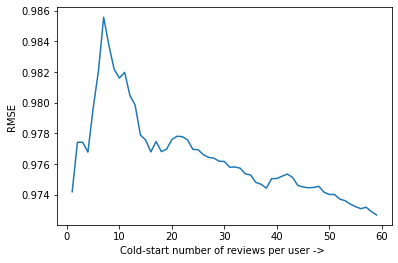

In [60]:
# import matplotlib.pyplot as plt
# x_axis = np.array(range(1, 60))
# y_axis = RMSE_values 
# plt.plot(x_axis, y_axis[1:])  # Plot the chart
# plt.xlabel("Cold-start number of reviews per user -> ")
# plt.ylabel("RMSE")
# plt.show()  # display


In [ ]:
print("Now saving the RMSE values as an excel file...")
## convert your array into a dataframe
df = pd.DataFrame(RMSE_values)

## save to xlsx file

filepath = 'baseline_1M_iteration1.xlsx'

df.to_excel(filepath, index=False)
print("Finished saving RMSE values!")
